## **Economics Data Analysis with Fred & Pandas**

In [10]:
# For this project, the Fred API will allow us to retreieve economic data from the Economic Research Division of the Federal Reserve

# We pip install the Fred API 

# We supress the output of the pip install using "/dev/null" 


!pip install fredapi > null

In [11]:
# We import the tools necessary to complete our project

# We will utilize Pandas and Numpy libraries to perform our data analysis 

# We will utilize Matplotlib and Plotly to visualize our data 

    # Note, we apply the FiveThirtyEight style to our plot 
    
# We set the maximum number of columns to 500 in order to better visualize the dataset

# Finally, we import the data from the Fred API
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from fredapi import Fred

fred_key = '1ff39ea3deb65a0d2cf2ccafde0d8782'

## **Creating The Fred Object**

In [12]:
# We define the "fred" object which will allow us to access and retrieve data from the FRED service 

# Note the fred object is tied to our API key 

fred = Fred(api_key=fred_key)

## **Searching For Economic Data**

In [17]:
sp_search = fred.search('S&P', order_by= 'popularity')

In [18]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-06-12,2023-06-12,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-06-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-06-12 09:00:07-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-06-12,2023-06-12,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-05-30 09:01:01-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-06-12,2023-06-12,S&P 500,2013-06-10,2023-06-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-06-09 19:10:51-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-06-12,2023-06-12,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-06-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-06-12 09:00:11-05:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-06-12,2023-06-12,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDEM01TZA156NWDB,DDEM01TZA156NWDB,2023-06-12,2023-06-12,Stock Market Turnover Ratio (Value Traded/Capi...,1999-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:28:50-05:00,3,Total value of shares traded during the period...
CRDQHKAPUBIS,CRDQHKAPUBIS,2023-06-12,2023-06-12,"Total Credit to Private Non-Financial Sector, ...",1978-10-01,2022-10-01,"Quarterly, End of Quarter",Q,Billions of Hong Kong Dollars,Bil. of Hong Kong $,Not Seasonally Adjusted,NSA,2023-06-12 13:03:08-05:00,3,"Credit is provided by domestic banks, all othe..."
CRDQSEAPUBIS,CRDQSEAPUBIS,2023-06-12,2023-06-12,"Total Credit to Private Non-Financial Sector, ...",1961-01-01,2022-10-01,"Quarterly, End of Quarter",Q,Billions of Swedish Kronas,Bil. of Swedish Kronas,Not Seasonally Adjusted,NSA,2023-06-12 13:01:07-05:00,3,"Credit is provided by domestic banks, all othe..."


## **Pull Raw Data & Plot**

In [21]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

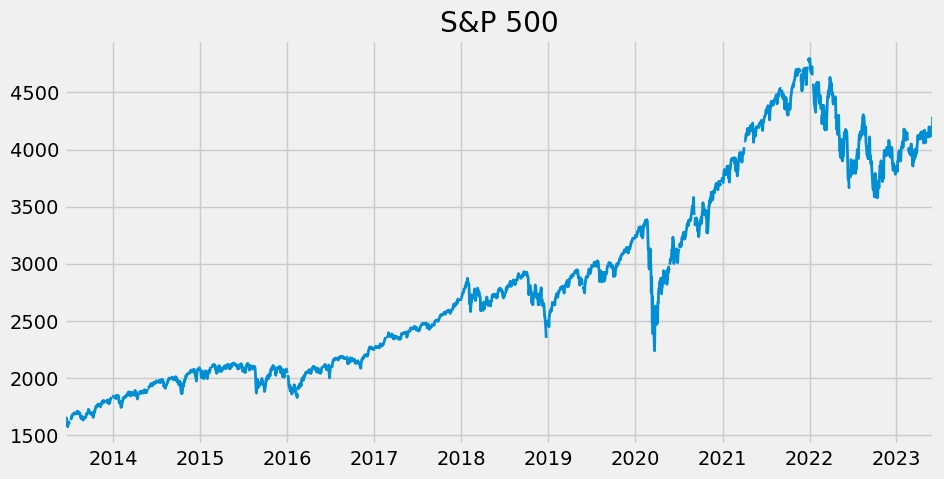

In [24]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

## **Pull and Join Multiple Data Series**

In [28]:
# We pull information on the datasets related to unemployment 

uemp_results = fred.search('unemployment')

uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-12,2023-06-12,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-06-12,2023-06-12,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:02-05:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2023-06-12,2023-06-12,Continued Claims (Insured Unemployment),1967-01-07,2023-05-27,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-06-08 07:33:03-05:00,75,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-06-12,2023-06-12,Continued Claims (Insured Unemployment),1967-01-07,2023-05-27,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-06-08 07:33:03-05:00,34,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-06-12,2023-06-12,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,67,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIDANE5URN,WIDANE5URN,2023-06-12,2023-06-12,"Unemployment Rate in Dane County, WI",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:10:04-05:00,5,These data come from the Current Population Su...
MIWAYN3URN,MIWAYN3URN,2023-06-12,2023-06-12,"Unemployment Rate in Wayne County, MI",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:12:03-05:00,5,These data come from the Current Population Su...
CAMARI5URN,CAMARI5URN,2023-06-12,2023-06-12,"Unemployment Rate in Marin County, CA",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:21:10-05:00,5,These data come from the Current Population Su...


In [30]:
# We pull the seasonally adjusted unemployment rate

unrate = fred.get_series('UNRATE')

unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
Length: 905, dtype: float64

<Axes: >

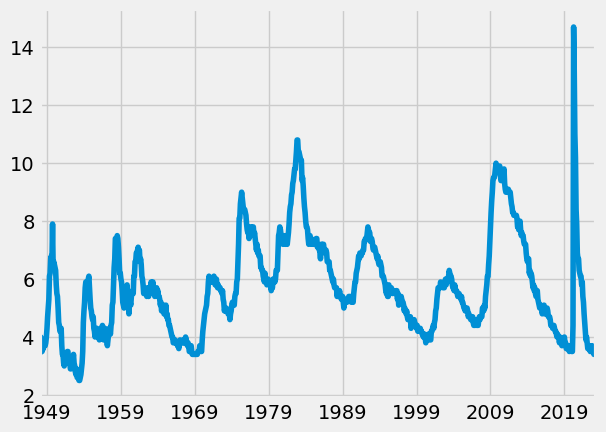

In [31]:
# We quickly plot the unemployment rate 

unrate.plot()

In [32]:
# We can search and explore the unemployment rate at the state level

fred.search('unemployment state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-12,2023-06-12,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-06-12,2023-06-12,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:02-05:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2023-06-12,2023-06-12,Continued Claims (Insured Unemployment),1967-01-07,2023-05-27,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-06-08 07:33:03-05:00,75,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-06-12,2023-06-12,Continued Claims (Insured Unemployment),1967-01-07,2023-05-27,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-06-08 07:33:03-05:00,34,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-06-12,2023-06-12,Unemployment Level,1948-01-01,2023-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-06-02 07:46:04-05:00,67,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JOBLOSPA,JOBLOSPA,2023-06-12,2023-06-12,Unemployed: Job Losers for Pennsylvania,2003-10-01,2022-07-01,Quarterly,Q,"Persons, 4-Quarter Moving Average","Persons, 4-Qtr. Moving Average",Not Seasonally Adjusted,NSA,2022-10-28 14:56:39-05:00,3,None
LAUCN132950000000004A,LAUCN132950000000004A,2023-06-12,2023-06-12,"Unemployed Persons in Walker County, GA",1990-01-01,2022-01-01,Annual,A,Persons,Persons,Not Seasonally Adjusted,NSA,2023-05-03 10:40:45-05:00,0,These data come from the Current Population Su...
LNU04000029,LNU04000029,2023-06-12,2023-06-12,"Unemployment Rate - 20 Yrs. & over, White Women",1954-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:47:21-05:00,1,To obtain estimates of women worker employment...


In [34]:
# We create a dataframe with the unemployment data at the state level 

unemp_df = fred.search('unemployment rate state', filter =('frequency','Monthly'))

unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-12,2023-06-12,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-06-12,2023-06-12,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:02-05:00,54,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-06-12,2023-06-12,Unemployment Level,1948-01-01,2023-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-06-02 07:46:04-05:00,67,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-06-12,2023-06-12,Unemployment Rate - Black or African American,1972-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:06-05:00,65,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-06-12,2023-06-12,Unemployment Rate - Black or African American,1972-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:20-05:00,18,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ALLE942UR,ALLE942UR,2023-06-12,2023-06-12,Unemployment Rate in Allentown-Bethlehem-Easto...,1990-01-01,2023-04-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-05-31 13:31:07-05:00,2,None
OHSCIO9URN,OHSCIO9URN,2023-06-12,2023-06-12,"Unemployment Rate in Scioto County, OH",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:23:04-05:00,2,These data come from the Current Population Su...
ILTAZE5URN,ILTAZE5URN,2023-06-12,2023-06-12,"Unemployment Rate in Tazewell County, IL",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:17:37-05:00,2,These data come from the Current Population Su...


In [36]:
# We filter the previous state unemployment data to the frequency as Monthly

# This will only return results that have a frequency of monthly 

# We label this new dataframe as "unemp_df"

unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [40]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [42]:
# We're going to search for unemployment rate in the title

unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
# Next we want to go through each ID and pull the series data down 

# We loop through each of them and run the git series Fred command 

In [47]:
# We review all the unique ID's that we will want to pull down

unique_ids = unemp_df['id'].unique()
print(unique_ids)

['UNRATE' 'LNS14000006' 'CAUR' 'M0892AUSM156SNBR' 'M0892BUSM156SNBR'
 'FLUR' 'TXUR' 'LNS14000002' 'NYUR' 'LNS14000031' 'U2RATE' 'LNS14000024'
 'LNS14000009' 'LNS14000003' 'OHUR' 'ALUR' 'MIUR' 'LNS14000001' 'PAUR'
 'ILUR' 'LRUN64TTUSM156S' 'MAUR' 'MNUR' 'LNS14024887' 'LNS14027662' 'NCUR'
 'LNS14027660' 'COUR' 'NJUR' 'LNS14000012' 'LASMT261982000000003' 'VAUR'
 'TNUR' 'GAUR' 'AZUR' 'SCUR' 'WIUR' 'KYUR' 'WAUR' 'ORUR' 'WVUR' 'NVUR'
 'NMUR' 'LNS14032183' 'MOUR' 'OKUR' 'ARUR' 'LNS14027659' 'LAUR' 'AKUR'
 'INUR' 'UTUR' 'IAUR' 'MDUR' 'KSUR' 'LNS14000060' 'LASMT391746000000003'
 'CTUR' 'HIUR' 'NDUR' 'DCUR' 'NHUR' 'MEUR' 'NEUR' 'MSUR' 'SDUR' 'PRUR'
 'MTUR' 'RIUR' 'LNS14000018' 'LNS14000036' 'WYUR' 'DEUR' 'IDUR'
 'LRHUTTTTUSM156S' 'VTUR' 'LNS14000032' 'LRUNTTTTUSM156S' 'LNS14000028'
 'LNS14000315' 'USAURAMS' 'LNS14024230' 'CMWRUR' 'LNS14027689'
 'LNS14000093' 'LNS14000025' 'LRUN24TTUSM156S' 'LNS14000089' 'LNS14000026'
 'LNS14000029' 'LNS14200000' 'LNS14000048' 'LNS14023705' 'CSOUUR'
 'LNS14000150

In [51]:
len(unique_ids)

98

In [55]:
all_results = []

for myid in unemp_df.index: 
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [57]:
# We can verify the data type of the list we just created

type(all_results)

list

In [65]:
# The data is now in a list with each value in the list having one DataFrame

# This will allow us to access and manipulate the data for each ID separately 


all_results [2]

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-12-01,4.1
2023-01-01,4.2
2023-02-01,4.4
2023-03-01,4.4


In [75]:
uemp_results = pd.concat(all_results, axis=1)

In [86]:
uemp_results

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,FLUR,TXUR,LNS14000002,NYUR,LNS14000031,U2RATE,LNS14000024,LNS14000009,LNS14000003,OHUR,ALUR,MIUR,LNS14000001,PAUR,ILUR,LRUN64TTUSM156S,MAUR,MNUR,LNS14024887,LNS14027662,NCUR,LNS14027660,COUR,NJUR,LNS14000012,LASMT261982000000003,VAUR,TNUR,GAUR,AZUR,SCUR,WIUR,KYUR,WAUR,ORUR,WVUR,NVUR,NMUR,LNS14032183,MOUR,OKUR,ARUR,LNS14027659,LAUR,AKUR,INUR,UTUR,IAUR,MDUR,KSUR,LNS14000060,LASMT391746000000003,CTUR,HIUR,NDUR,DCUR,NHUR,MEUR,NEUR,MSUR,SDUR,PRUR,MTUR,RIUR,LNS14000018,LNS14000036,WYUR,DEUR,IDUR,LRHUTTTTUSM156S,VTUR,LNS14000032,LRUNTTTTUSM156S,LNS14000028,LNS14000315,USAURAMS,LNS14024230,CMWRUR,LNS14027689,LNS14000093,LNS14000025,LRUN24TTUSM156S,LNS14000089,LNS14000026,LNS14000029,LNS14200000,LNS14000048,LNS14023705,CSOUUR,LNS14000150,CNERUR,CWSTUR,LNS14100000
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.4,5.4,4.2,NaN,NaN,2.6,3.9,3.3,4.2,5.3,1.5,3.2,4.5,3.1,4.0,2.6,4.3,3.6,4.3,4.5,3.576408,3.5,2.9,8.0,2.0,3.8,3.7,2.8,3.4,10.3,3.8,3.2,3.5,3.1,3.8,3.2,2.9,3.9,4.6,4.8,3.9,5.5,3.5,2.8,2.7,3.1,3.4,4.5,3.5,3.8,3.1,2.4,3.0,3.0,2.9,3.0,4.3,3.9,3.6,2.1,4.5,2.8,2.9,2.5,3.9,2.1,6.0,2.5,3.1,15.8,7.1,3.9,4.6,2.7,3.4,2.9,4.7,3.4,2.9,1.9,NaN,2.3,3.5,2.9,2.3,3.2,8.0,3.9,3.1,2.8,3.8,2.8,0.5,3.3,1.8,3.9,4.0,3.4
2023-02-01,3.6,5.7,4.4,NaN,NaN,2.6,4.0,3.5,4.2,5.1,1.7,3.3,5.3,3.2,3.9,2.5,4.3,3.6,4.4,4.5,3.685829,3.7,3.0,8.1,2.0,3.6,3.6,2.9,3.5,11.1,3.8,3.2,3.5,3.1,3.7,3.2,2.7,3.9,4.6,4.7,3.7,5.5,3.6,3.4,2.6,3.0,3.2,5.8,3.6,3.8,3.1,2.4,2.9,2.9,2.9,3.1,4.2,4.0,3.6,2.1,4.7,2.7,2.8,2.3,3.7,2.1,6.0,2.4,3.1,20.4,6.9,3.8,4.6,2.6,3.6,2.8,5.1,3.6,3.0,2.0,NaN,2.5,3.5,

In [94]:
uemp_states = uemp_results.drop('UNRATE', axis=1)

<Axes: >

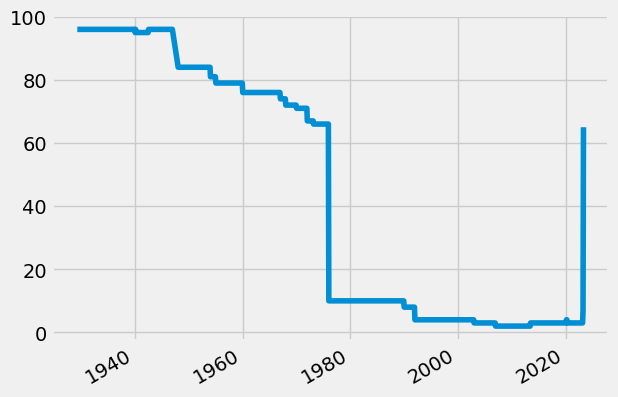

In [95]:
# We plot the previous data to determine when they provided monthly unemployment rate for states

uemp_states.isna().sum(axis=1).plot()

In [96]:
uemp_states = uemp_states.dropna()

In [97]:
uemp_states

,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,FLUR,TXUR,LNS14000002,NYUR,LNS14000031,U2RATE,LNS14000024,LNS14000009,LNS14000003,OHUR,ALUR,MIUR,LNS14000001,PAUR,ILUR,LRUN64TTUSM156S,MAUR,MNUR,LNS14024887,LNS14027662,NCUR,LNS14027660,COUR,NJUR,LNS14000012,LASMT261982000000003,VAUR,TNUR,GAUR,AZUR,SCUR,WIUR,KYUR,WAUR,ORUR,WVUR,NVUR,NMUR,LNS14032183,MOUR,OKUR,ARUR,LNS14027659,LAUR,AKUR,INUR,UTUR,IAUR,MDUR,KSUR,LNS14000060,LASMT391746000000003,CTUR,HIUR,NDUR,DCUR,NHUR,MEUR,NEUR,MSUR,SDUR,PRUR,MTUR,RIUR,LNS14000018,LNS14000036,WYUR,DEUR,IDUR,LRHUTTTTUSM156S,VTUR,LNS14000032,LRUNTTTTUSM156S,LNS14000028,LNS14000315,USAURAMS,LNS14024230,CMWRUR,LNS14027689,LNS14000093,LNS14000025,LRUN24TTUSM156S,LNS14000089,LNS14000026,LNS14000029,LNS14200000,LNS14000048,LNS14023705,CSOUUR,LNS14000150,CNERUR,CWSTUR,LNS14100000
